# <center> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготовливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии теперь будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим неколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *csv_files_mask* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Сессии должны быть уникальными, можно использовать pandas.DataFrame.drop_duplicates
- Замеряйте время выполнения итераций цикла с помощью *time* из *time* (или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress), [статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import pickle
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline

In [4]:
def chunks(l, n, step=None):
    """Yield successive n-sized chunks from l."""
    if step is None:
        step = n
    for i in range(0, len(l), step):
        yield l[i:i + n]

In [7]:
def to_sparse(X_toy):
    indptr = [0]
    indices = []
    data = []
    for d in X_toy:
        for term in d:
            index = term
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    X_sparse_toy = csr_matrix((data, indices, indptr), dtype=int)[:,1:]
    return X_sparse_toy

In [42]:
def prepare_sparse_train_set_window(
    csv_files_mask, site_freq_path, 
    session_length=10, window_size=10):
    sessions = []
    for file in sorted(glob(csv_files_mask)):
        df = pd.read_csv(
            file, header=None, 
            names=['id', 'timestamp', 'site'])
        df.drop_duplicates()
        tmp_s = []
        for x in chunks(df["site"].values.tolist(), 
                        session_length, window_size):
            tmp_s.append(x)
        sessions.append(tmp_s)
    
    with open(site_freq_path, "rb") as f_in:
        site2id = pickle.load(f_in)
    
    for x in sessions:
        for y in x:
            for z in y:
                if isinstance(site2id[z], int):
                    site2id[z] = (site2id[z], 1)
                else:
                    site2id[z] = (site2id[z][0], site2id[z][1] + 1)
    
    sessions = list(map(
        lambda x: list(map(
                lambda y: [x[0]] + list(map(
                        lambda z: site2id[z][0], 
                        y)), 
                x[1])), 
        enumerate(sessions)))
    sessions = list(map(
        lambda x: list(map(
                lambda y: y 
                if len(y) >= session_length+1 
                else y + [0]*(session_length+1 - len(y)), 
                x)), 
        sessions))
    sessions = np.array(list(map(
                lambda y: np.array(list(map(np.array, y))), 
                sessions)))
    sessions = np.vstack(sessions)
    
    df2 = pd.DataFrame(
        data=sessions, 
        columns=["target"] + 
            ["site{}".format(i+1) for i in range(session_length)])
    df2.drop_duplicates()
    
    X_vals, y_vals = df2.iloc[:, 1:].values, df2.iloc[:, 0].values
    
    return to_sparse(X_vals), y_vals

In [43]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(
    'capstone_websites_data/3users_toy/*.csv',
    'capstone_websites_data/site_freq_3users.pkl',
    session_length=5, window_size=3)

In [44]:
X_toy_s5_w3.todense()

matrix([[0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0],
        [0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [4]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы 'capstone_websites_data/X\_sparse_{num_users}users_s{session_length}_w{window_size}.pkl' и 'capstone\_websites\_data/y\_{num_users}users_s{session_length}_w{window_size}.pkl'.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 45 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [47]:
def process_users(num_users, window_size, session_length):
    X_sparse, y = prepare_sparse_train_set_window(
        'capstone_websites_data/{num_users}users/*.csv'.format(num_users=num_users),
        'capstone_websites_data/site_freq_{num_users}users.pkl'.format(num_users=num_users),
        session_length=session_length, window_size=window_size)

    x_path = 'capstone_websites_data/X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'.format(num_users=num_users, session_length=session_length, window_size=window_size)
    y_path = 'capstone_websites_data/y_{num_users}users_s{session_length}_w{window_size}.pkl'.format(num_users=num_users, session_length=session_length, window_size=window_size)
    
    with open(x_path, 'wb') as X_pkl:
        pickle.dump(X_sparse, X_pkl)
    with open(y_path, 'wb') as y_pkl:
        pickle.dump(y, y_pkl)
    
    return X_sparse.shape[0]

In [48]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            res = process_users(num_users, window_size, session_length)
            data_lengths.append(res)

CPU times: user 57.4 s, sys: 630 ms, total: 58 s
Wall time: 58.1 s


**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [49]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [54]:
write_answer_to_file(" ".join(list(map(str, data_lengths))), 
                     'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл train_data_10users.csv. Далее будем работать с ним.**

In [55]:
train_df = pd.read_csv('capstone_websites_data/train_data_10users.csv', 
                       index_col='session_id')

In [56]:
train_df.head()

,target,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,,
0,0,252,370,370,4104,2865,1314,2306,4318,4172,4318
1,0,4318,4172,4318,4318,2455,4869,2897,3050,941,206
2,0,4318,1663,2354,3722,3722,4172,3722,3722,4869,4104
3,0,3069,2906,993,3722,1837,3722,3722,3722,3722,3056
4,0,348,2993,3589,3722,1659,2336,1759,2915,629,1063


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
target    14061 non-null int64
site1     14061 non-null int64
site2     14061 non-null int64
site3     14061 non-null int64
site4     14061 non-null int64
site5     14061 non-null int64
site6     14061 non-null int64
site7     14061 non-null int64
site8     14061 non-null int64
site9     14061 non-null int64
site10    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [58]:
train_df['target'].value_counts()

6    2796
2    2204
7    1868
5    1712
8    1643
1    1022
3     802
0     760
4     720
9     534
Name: target, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [124]:
num_unique_sites = [np.unique(train_df.values[i, 1:]).shape[0] 
                    for i in range(train_df.shape[0])]

In [125]:
pd.Series(num_unique_sites).value_counts()

6     2248
7     2247
5     1877
8     1769
2     1506
4     1298
9     1101
3     1088
1      500
10     427
dtype: int64

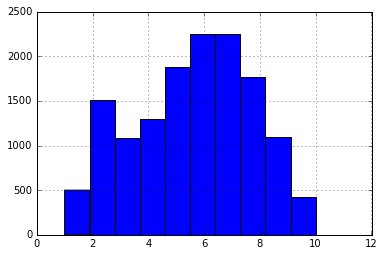

In [126]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответ на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

In [127]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


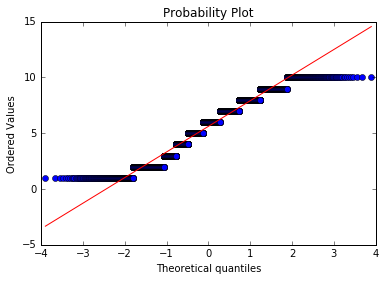

In [128]:
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()

In [129]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))

Shapiro-Wilk normality test, W-statistic: 0.957596, p-value: 0.000000


In [130]:
write_answer_to_file('NO', 
                     'answer2_2.txt')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Конкретно, проверьте с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет порядок полученного p-value (например, если p=2.3e-4, то ответ будет -4).**

In [131]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [133]:
stats.binom_test(
    x=sum(has_two_similar), 
    n=len(has_two_similar),
    p=0.95, alternative='greater')

1.0857838784326601e-30

In [134]:
write_answer_to_file('-30', 
                     'answer2_3.txt')

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответов на 4 вопрос теста.**

In [135]:
from statsmodels.stats.proportion import proportion_confint

In [136]:
wilson_interval = proportion_confint(
    sum(has_two_similar), 
    len(has_two_similar), 
    method = 'normal')

In [137]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [ ]:
site_freqs = ''' ВАШ КОД ЗДЕСЬ '''

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [ ]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

In [ ]:
write_answer_to_file('{} {}'.format(''' ВАШ КОД ЗДЕСЬ ''', 
                                    'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (.ipynb или pdf) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can-yandex-mipt) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.